# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('dataset.csv',parse_dates = ["Date"])  # reading the dataset
df

,Date,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
0,2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,NaN,NaN
1,2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,NaN,NaN
2,2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,NaN,NaN
3,2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,NaN,NaN
4,2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,2020-03-29,Visakhapatnam,22.17,57.42,7.03,22.72,17.81,5.55,0.11,11.33,41.66,86.0,Satisfactory
630,2020-03-30,Visakhapatnam,21.62,65.48,6.23,24.02,17.83,5.40,0.11,10.42,59.94,69.0,Satisfactory
631,2020-03-31,Visakhapatnam,18.77,52.17,6.65,25.22,18.82,5.64,0.11,8.52,46.99,84.0,Satisfactory
632,2020-04-01,Visakhapatnam,30.43,76.29,9.90,33.10,25.65,5.35,0.11,7.39,23.15,64.0,Satisfactory


# Features

In [3]:
#--City
#--Date
#-->PM2.5 (Particulate Matter 2.5-micrometer)
#-->PM10 (Particulate Matter 10-micrometer)
#-->SO2 (Sulphur Dioxide)
#-->NOx (Any Nitric x-oxide)
#-->NH3 (Ammonia)
#-->CO (Carbon Monoxide)
#-->O3 (Ozone )
#-->AQI
#-->AQI_Bucket

<AxesSubplot:>

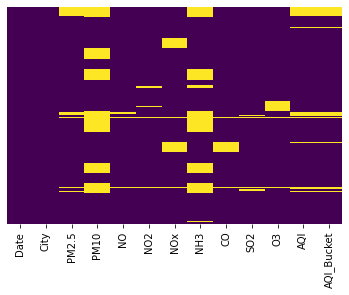

In [4]:
# plotting a heatmap to see numm values present
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
# checking which column has how many null values
print(df.isnull().sum())

Date            0
City            0
PM2.5          45
PM10          212
NO             12
NO2            17
NOx            70
NH3           193
CO             39
SO2            15
O3             39
AQI            60
AQI_Bucket     60
dtype: int64


In [6]:
df.describe() #gives the information about all the cities all together

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
count,589.000000,422.000000,622.000000,617.000000,564.000000,441.000000,595.000000,619.000000,595.000000,574.000000
mean,56.092852,97.528507,20.448376,20.155575,33.305816,16.572200,2.651277,11.237124,35.755748,136.482578
std,46.641127,58.325798,28.998592,19.331091,36.535928,16.449106,8.962194,10.895085,26.961829,85.680108
min,6.750000,13.800000,0.600000,0.080000,0.000000,0.860000,0.000000,0.480000,0.180000,31.000000
25%,29.800000,56.575000,3.662500,6.800000,10.275000,6.310000,0.555000,4.020000,15.110000,80.000000
50%,44.580000,85.300000,8.985000,15.940000,21.485000,12.310000,0.930000,8.320000,30.830000,106.000000
75%,68.670000,118.830000,21.707500,26.260000,43.742500,20.780000,1.490000,13.730000,50.665000,156.750000
max,539.130000,436.170000,176.540000,120.800000,259.540000,133.250000,132.070000,106.930000,138.180000,661.000000


In [7]:
df.info()  #information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        634 non-null    datetime64[ns]
 1   City        634 non-null    object        
 2   PM2.5       589 non-null    float64       
 3   PM10        422 non-null    float64       
 4   NO          622 non-null    float64       
 5   NO2         617 non-null    float64       
 6   NOx         564 non-null    float64       
 7   NH3         441 non-null    float64       
 8   CO          595 non-null    float64       
 9   SO2         619 non-null    float64       
 10  O3          595 non-null    float64       
 11  AQI         574 non-null    float64       
 12  AQI_Bucket  574 non-null    object        
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 64.5+ KB


# STEP 1: Data validation and Preprocessing
# Cleaning up the data (Cleansing the data)
# Converting raw data to clean dataset

In [9]:
#Converting dtype of date column to datetime
df['Date']=df['Date'].apply(pd.to_datetime)

#setting date column as index
df.set_index('Date',inplace=True)

In [10]:
df.columns
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
Date,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-29,Visakhapatnam,22.17,57.42,7.03,22.72,17.81,5.55,0.11,11.33,41.66,86.0,Satisfactory
2020-03-30,Visakhapatnam,21.62,65.48,6.23,24.02,17.83,5.40,0.11,10.42,59.94,69.0,Satisfactory
2020-03-31,Visakhapatnam,18.77,52.17,6.65,25.22,18.82,5.64,0.11,8.52,46.99,84.0,Satisfactory


In [88]:
# filling the Nan values present in the pollutants with mean (city wise)
df.iloc[:, 1:10] = df.groupby("City").transform(lambda x: x.fillna(x.mean())) # not working

C:\Users\hp\AppData\Local\Temp/ipykernel_31548/3876716871.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df.iloc[:, 1:10] = df.groupby("City").transform(lambda x: x.fillna(x.mean())) # not working


In [11]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
Date,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-29,Visakhapatnam,22.17,57.42,7.03,22.72,17.81,5.55,0.11,11.33,41.66,86.0,Satisfactory
2020-03-30,Visakhapatnam,21.62,65.48,6.23,24.02,17.83,5.40,0.11,10.42,59.94,69.0,Satisfactory
2020-03-31,Visakhapatnam,18.77,52.17,6.65,25.22,18.82,5.64,0.11,8.52,46.99,84.0,Satisfactory


In [12]:
df['PM2.5'].fillna(value=df['PM2.5'].mean(), inplace=True)
df['PM10'].fillna(value=df['PM10'].mean(), inplace=True)
df['NO'].fillna(value=df['NO'].mean(), inplace=True)
df['NO2'].fillna(value=df['NO2'].mean(), inplace=True)
df['NH3'].fillna(value=df['NH3'].mean(), inplace=True)
df['NOx'].fillna(value=df['NOx'].mean(), inplace=True)
df['CO'].fillna(value=df['CO'].mean(), inplace=True)
df['SO2'].fillna(value=df['SO2'].mean(), inplace=True)
df['O3'].fillna(value=df['O3'].mean(), inplace=True)

In [13]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
Date,,,,,,,,,,,,
2015-01-01,Ahmedabad,56.092852,97.528507,0.92,18.22,17.15,16.5722,0.92,27.64,133.36,NaN,NaN
2015-01-02,Ahmedabad,56.092852,97.528507,0.97,15.69,16.46,16.5722,0.97,24.55,34.06,NaN,NaN
2015-01-03,Ahmedabad,56.092852,97.528507,17.40,19.30,29.70,16.5722,17.40,29.07,30.70,NaN,NaN
2015-01-04,Ahmedabad,56.092852,97.528507,1.70,18.48,17.97,16.5722,1.70,18.59,36.08,NaN,NaN
2015-01-05,Ahmedabad,56.092852,97.528507,22.10,21.42,37.76,16.5722,22.10,39.33,39.31,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-29,Visakhapatnam,22.170000,57.420000,7.03,22.72,17.81,5.5500,0.11,11.33,41.66,86.0,Satisfactory
2020-03-30,Visakhapatnam,21.620000,65.480000,6.23,24.02,17.83,5.4000,0.11,10.42,59.94,69.0,Satisfactory
2020-03-31,Visakhapatnam,18.770000,52.170000,6.65,25.22,18.82,5.6400,0.11,8.52,46.99,84.0,Satisfactory


In [14]:
# cheching the min and max value of most common pollutants
print("Minimum value of NO2 is:",df.NO2.min())
print("Minimum value of SO2 is:",df.SO2.min())
print("Maximum value of SO2 is:",df.SO2.max())
print("Maximum value of NO2 is:",df.NO2.max())

Minimum value of NO2 is: 0.08
Minimum value of SO2 is: 0.48
Maximum value of SO2 is: 106.93
Maximum value of NO2 is: 120.8


In [15]:
print("NO2 POLLUTION RANGE:",sorted(df['NO2'].unique())) #Printing unique values

NO2 POLLUTION RANGE: [0.08, 0.09, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.21, 0.24, 0.25, 0.26, 0.27, 0.3, 0.31, 0.33, 0.35, 0.36, 0.4, 0.61, 0.66, 0.68, 0.69, 0.72, 0.81, 0.83, 0.87, 0.88, 0.91, 1.04, 1.07, 1.19, 1.24, 1.27, 1.3, 1.31, 1.39, 1.42, 1.43, 1.48, 1.58, 1.63, 1.72, 1.77, 1.88, 1.96, 2.14, 2.32, 2.42, 2.63, 2.66, 2.85, 2.98, 3.0, 3.13, 3.27, 3.36, 3.42, 3.45, 3.59, 3.77, 3.83, 3.86, 3.88, 3.9, 4.07, 4.09, 4.12, 4.13, 4.18, 4.24, 4.25, 4.31, 4.4, 4.42, 4.48, 4.52, 4.54, 4.55, 4.6, 4.7, 4.72, 4.78, 4.8, 4.84, 4.86, 4.89, 4.91, 4.94, 4.97, 5.03, 5.06, 5.08, 5.13, 5.15, 5.2, 5.21, 5.27, 5.32, 5.37, 5.4, 5.48, 5.51, 5.53, 5.6, 5.62, 5.64, 5.71, 5.74, 5.77, 5.78, 5.81, 5.87, 5.9, 5.98, 5.99, 6.0, 6.02, 6.03, 6.08, 6.09, 6.1, 6.12, 6.13, 6.15, 6.24, 6.31, 6.35, 6.43, 6.48, 6.51, 6.53, 6.55, 6.58, 6.6, 6.64, 6.67, 6.72, 6.8, 6.93, 6.97, 7.01, 7.04, 7.09, 7.1, 7.14, 7.34, 7.4, 7.46, 7.48, 7.6, 7.63, 7.7, 7.78, 7.8, 7.88, 7.91, 7.95, 7.98, 8.05, 8.14, 8.18, 8.2, 8.22, 8.34,

# Various Graph Visualisations

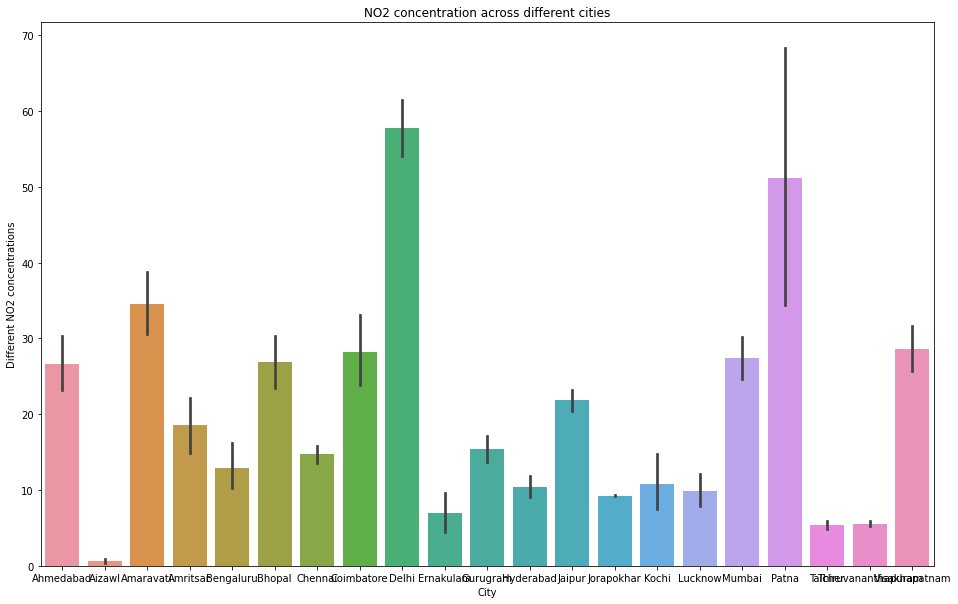

In [16]:
fig ,ax = plt.subplots(figsize=(16,10))
ax = sns.barplot(x='City',y='NO2',data=df)
ax.set(ylabel='Different NO2 concentrations',title = 'NO2 concentration across different cities')
plt.show()

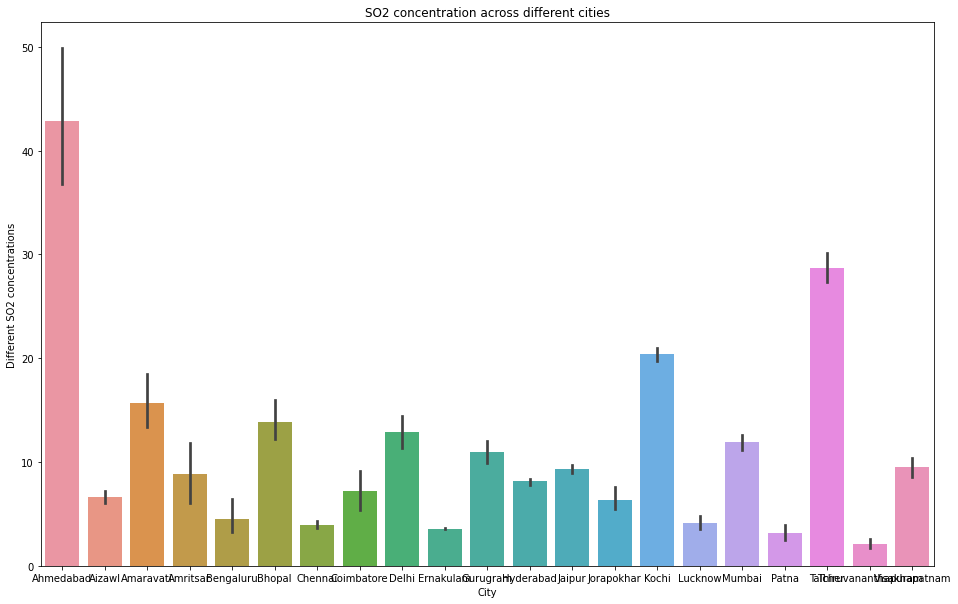

In [123]:
fig ,ax = plt.subplots(figsize=(16,10))
ax = sns.barplot(x='City',y='SO2',data=df)
ax.set(ylabel='Different SO2 concentrations',title = 'SO2 concentration across different cities')
plt.show()

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


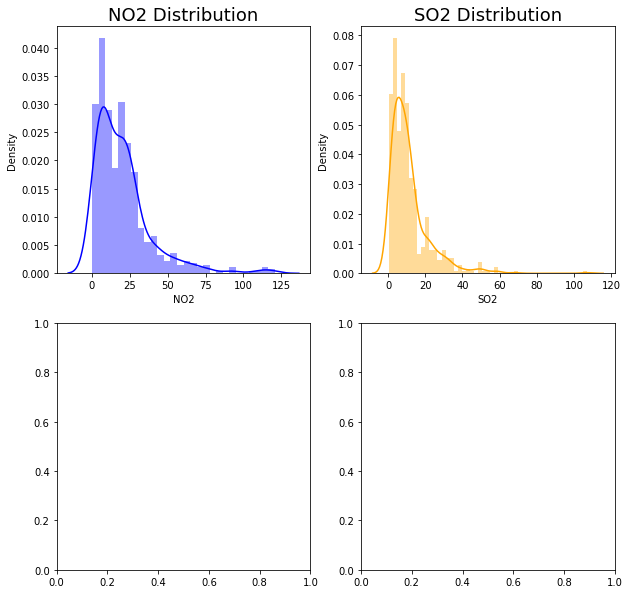

In [17]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (10,10))
sns.distplot(df['NO2'], color = 'blue',  ax = axs[0][0])
sns.distplot(df['SO2'], color = 'orange',  ax = axs[0][1])
axs[0][0].set_title('NO2 Distribution', fontsize = 18)
axs[0][1].set_title('SO2 Distribution', fontsize = 18)
plt.show()

In [18]:
print("SO2 POLLUTION RANGE:",sorted(df['SO2'].unique()))

SO2 POLLUTION RANGE: [0.48, 0.63, 0.64, 0.69, 0.78, 0.86, 0.98, 1.01, 1.02, 1.03, 1.05, 1.13, 1.15, 1.2, 1.28, 1.31, 1.38, 1.39, 1.41, 1.59, 1.61, 1.65, 1.66, 1.67, 1.7, 1.72, 1.79, 1.8, 1.84, 1.85, 1.9, 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.98, 2.0, 2.03, 2.04, 2.05, 2.08, 2.1, 2.15, 2.17, 2.18, 2.19, 2.2, 2.21, 2.22, 2.23, 2.24, 2.26, 2.29, 2.32, 2.33, 2.37, 2.4, 2.46, 2.48, 2.49, 2.5, 2.52, 2.54, 2.58, 2.6, 2.63, 2.66, 2.71, 2.72, 2.73, 2.75, 2.79, 2.84, 2.85, 2.87, 2.89, 2.94, 2.96, 2.97, 3.05, 3.17, 3.18, 3.22, 3.29, 3.32, 3.39, 3.4, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.51, 3.53, 3.54, 3.56, 3.58, 3.59, 3.6, 3.61, 3.62, 3.64, 3.66, 3.67, 3.68, 3.75, 3.78, 3.81, 3.83, 3.87, 3.88, 3.89, 3.95, 3.97, 3.99, 4.05, 4.06, 4.07, 4.08, 4.12, 4.2, 4.22, 4.26, 4.3, 4.36, 4.39, 4.42, 4.43, 4.46, 4.48, 4.51, 4.52, 4.53, 4.54, 4.57, 4.59, 4.62, 4.63, 4.66, 4.67, 4.71, 4.75, 4.84, 4.86, 4.9, 4.92, 4.94, 4.97, 4.98, 5.04, 5.16, 5.18, 5.19, 5.2, 5.21, 5.3, 5.32, 5.33, 5.36, 5.41, 5.53, 5.63, 5.7, 

<AxesSubplot:ylabel='Date'>

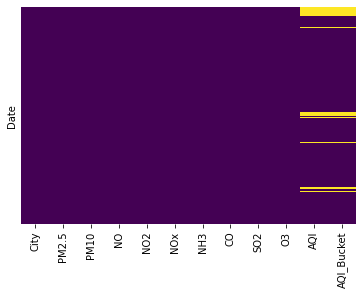

In [19]:
#checking if null values are still present
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# AQI Calculation

In [20]:
#The AQI calculation uses 7 measures: PM2.5, PM10, SO2, NOx, NH3, CO and O3.
#-->For PM2.5, PM10, SO2, NOx and NH3 the average value in last 24-hrs is used with the condition of having at least 16 values.

#-->For CO and O3 the maximum value in last 8-hrs is used.

#-->Each measure is converted into a Sub-Index based on pre-defined groups.

#-->Sometimes measures are not available due to lack of measuring or lack of required data points.

#-->Final AQI is the maximum Sub-Index with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

# Calculating Sub-Index

In [22]:
# PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x > 50 and x <= 100:
        return x
    elif x > 100 and x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x > 250 and x <= 350:
        return 200 + (x - 250)
    elif x > 350 and x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10"].astype(int).apply(lambda x: get_PM10_subindex(x))
    
# PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0
df["PM2.5_SubIndex"] = df["PM2.5"].astype(int).apply(lambda x: get_PM25_subindex(x))


# SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2"].astype(int).apply(lambda x: get_SO2_subindex(x))
# NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx"].astype(int).apply(lambda x: get_NOx_subindex(x))

# NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0
df["NH3_SubIndex"] = df["NH3"].astype(int).apply(lambda x: get_NH3_subindex(x))

# CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO"].astype(int).apply(lambda x: get_CO_subindex(x))

# O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3"].astype(int).apply(lambda x: get_O3_subindex(x))

# Filling the Nan values of AQI column by taking maximum values out of sub-Indexes

In [24]:
df["AQI"] = df["AQI"].fillna(round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1)))
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,56.092852,97.528507,0.92,18.22,17.15,16.5722,0.92,27.64,133.36,149.0,NaN,97.0,93.333333,33.75,21.25,4.00,0.000000,148.529412
2015-01-02,Ahmedabad,56.092852,97.528507,0.97,15.69,16.46,16.5722,0.97,24.55,34.06,97.0,NaN,97.0,93.333333,30.00,20.00,4.00,0.000000,34.000000
2015-01-03,Ahmedabad,56.092852,97.528507,17.40,19.30,29.70,16.5722,17.40,29.07,30.70,300.0,NaN,97.0,93.333333,36.25,36.25,4.00,300.000000,30.000000
2015-01-04,Ahmedabad,56.092852,97.528507,1.70,18.48,17.97,16.5722,1.70,18.59,36.08,97.0,NaN,97.0,93.333333,22.50,21.25,4.00,50.000000,36.000000
2015-01-05,Ahmedabad,56.092852,97.528507,22.10,21.42,37.76,16.5722,22.10,39.33,39.31,329.0,NaN,97.0,93.333333,48.75,46.25,4.00,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-29,Visakhapatnam,22.170000,57.420000,7.03,22.72,17.81,5.5500,0.11,11.33,41.66,86.0,Satisfactory,57.0,36.666667,13.75,21.25,1.25,0.000000,41.000000
2020-03-30,Visakhapatnam,21.620000,65.480000,6.23,24.02,17.83,5.4000,0.11,10.42,59.94,69.0,Satisfactory,65.0,35.000000,12.50,21.25,1.25,0.000000,59.000000
2020-03-31,Visakhapatnam,18.770000,52.170000,6.65,25.22,18.82,5.6400,0.11,8.52,46.99,84.0,Satisfactory,52.0,30.000000,10.00,22.50,1.25,0.000000,46.000000


# AQI Bucket

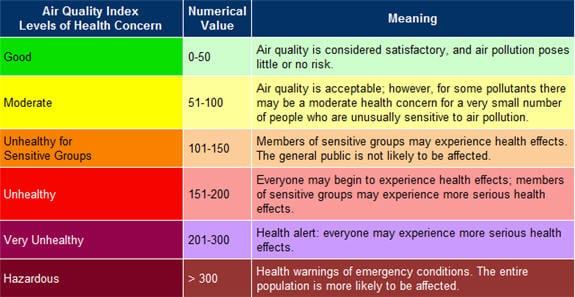

In [26]:
from IPython import display 
display.Image("air-quality-index.jpg",width = 500, height = 200)

# Calculating AQI bucket and filling the NAN value present

In [28]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'
    
df["AQI_Bucket"] = df["AQI_Bucket"].fillna(df["AQI"].apply(lambda x: get_AQI_bucket(x)))

In [29]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,56.092852,97.528507,0.92,18.22,17.15,16.5722,0.92,27.64,133.36,149.0,Moderate,97.0,93.333333,33.75,21.25,4.00,0.000000,148.529412
2015-01-02,Ahmedabad,56.092852,97.528507,0.97,15.69,16.46,16.5722,0.97,24.55,34.06,97.0,Satisfactory,97.0,93.333333,30.00,20.00,4.00,0.000000,34.000000
2015-01-03,Ahmedabad,56.092852,97.528507,17.40,19.30,29.70,16.5722,17.40,29.07,30.70,300.0,Poor,97.0,93.333333,36.25,36.25,4.00,300.000000,30.000000
2015-01-04,Ahmedabad,56.092852,97.528507,1.70,18.48,17.97,16.5722,1.70,18.59,36.08,97.0,Satisfactory,97.0,93.333333,22.50,21.25,4.00,50.000000,36.000000
2015-01-05,Ahmedabad,56.092852,97.528507,22.10,21.42,37.76,16.5722,22.10,39.33,39.31,329.0,Very Poor,97.0,93.333333,48.75,46.25,4.00,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-29,Visakhapatnam,22.170000,57.420000,7.03,22.72,17.81,5.5500,0.11,11.33,41.66,86.0,Satisfactory,57.0,36.666667,13.75,21.25,1.25,0.000000,41.000000
2020-03-30,Visakhapatnam,21.620000,65.480000,6.23,24.02,17.83,5.4000,0.11,10.42,59.94,69.0,Satisfactory,65.0,35.000000,12.50,21.25,1.25,0.000000,59.000000
2020-03-31,Visakhapatnam,18.770000,52.170000,6.65,25.22,18.82,5.6400,0.11,8.52,46.99,84.0,Satisfactory,52.0,30.000000,10.00,22.50,1.25,0.000000,46.000000


<AxesSubplot:ylabel='Date'>

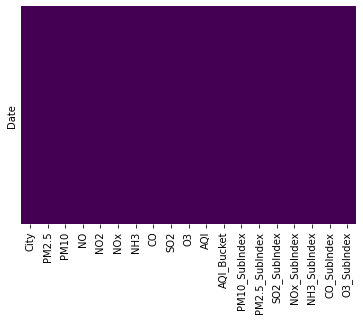

In [30]:
# checking null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

In [31]:
df_city_day = df.copy()
df_city_day.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'AQI', 'AQI_Bucket', 'PM10_SubIndex', 'PM2.5_SubIndex', 'SO2_SubIndex',
       'NOx_SubIndex', 'NH3_SubIndex', 'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

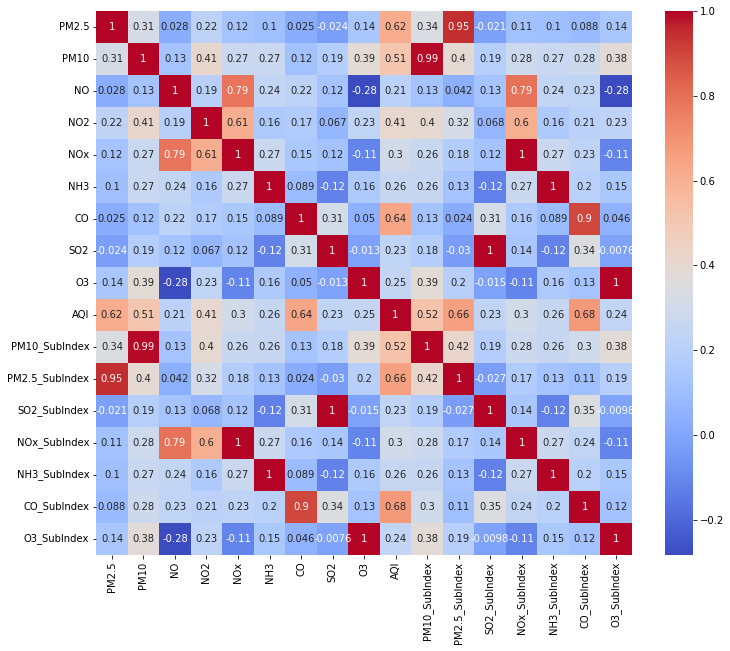

In [32]:
#plotting the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True);

Distribution of different pollutants


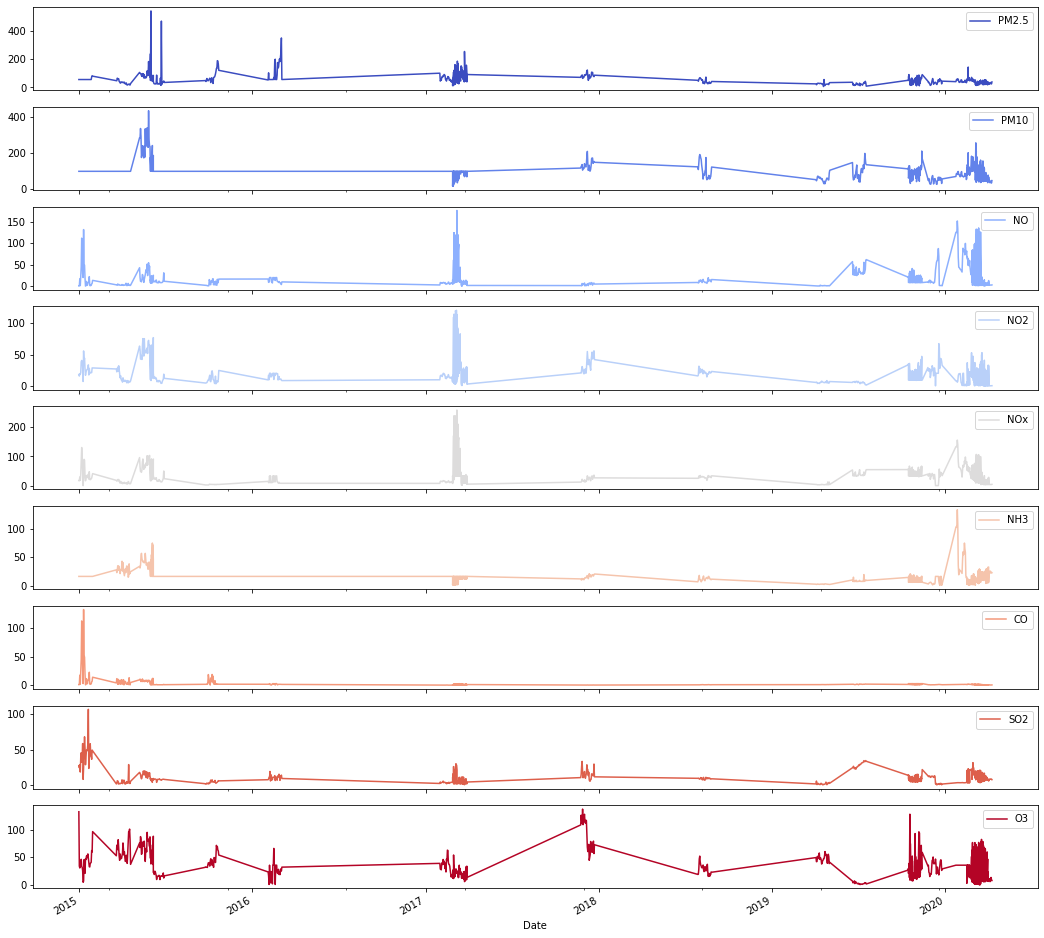

In [33]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3']
df_city_day = df_city_day[pollutants]

print('Distribution of different pollutants')
df_city_day.plot(kind='line',figsize=(18,18),cmap='coolwarm',subplots=True,fontsize=10);

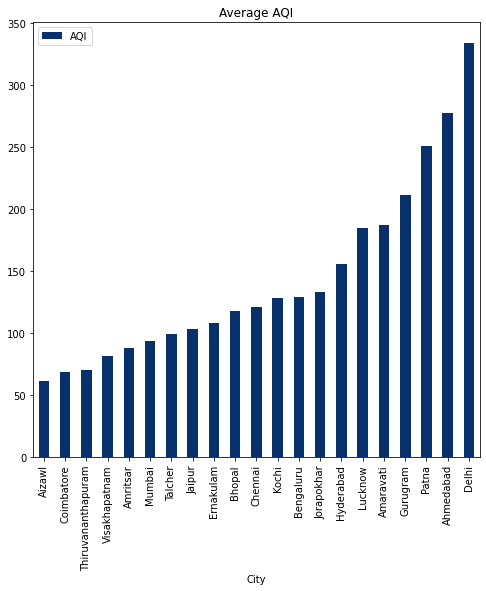

In [34]:
df[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='Blues_r',figsize=(8,8))
plt.title('Average AQI');

# By above graph we can conclude that Delhi is the highest polluted city followed by Amhedabad and Patna.

# Saving the finally formed dataframe for applying various models

In [41]:
df.to_csv('file1.csv')